<a href="https://colab.research.google.com/github/agmarrugo/computer-vision-utb/blob/main/notebooks/fft2_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Frequency analysis

Andres Marrugo, PhD    
Universidad Tecnológica de Bolívar

Filtering code from [hicraigchen](https://hicraigchen.medium.com/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82)

In this laboratory practice, we will use Fourier transforms to process images and analyze their content.

In [ ]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import urllib.request

In [ ]:
IMAGE_URL = 'https://github.com/agmarrugo/computer-vision-utb/raw/main/data/utb-alcatraz.jpg'

urllib.request.urlretrieve(IMAGE_URL, 'oneCC.png')

img = cv2.imread('oneCC.png')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

<class 'numpy.ndarray'>


In [ ]:
# grab the dimensions of the image and use the dimensions to
# derive the center (x, y)-coordinates
(h, w) = img_gray.shape
(cX, cY) = (int(w / 2.0), int(h / 2.0))

In [ ]:
# compute the FFT to find the frequency transform, then shift
# the zero frequency component (i.e., DC component located at
# the top-left corner) to the center where it will be more
# easy to analyze
fft = np.fft.fft2(img_gray)
fftShift = np.fft.fftshift(fft)

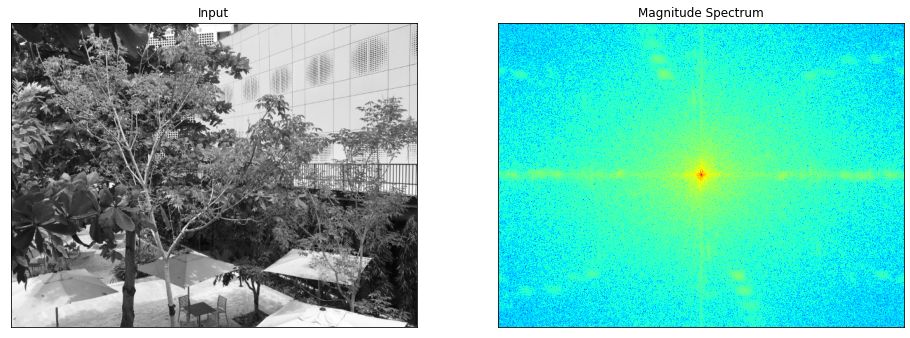

In [ ]:
# compute the magnitude spectrum of the transform
# magnitude = 20 * np.log(np.abs(fftShift))
magnitude = np.log(np.abs(fftShift + 1))

# display the original input image
(fig, ax) = plt.subplots(1, 2, figsize=(16, 12))
ax[0].imshow(img_gray, cmap="gray")
ax[0].set_title("Input")
ax[0].set_xticks([])
ax[0].set_yticks([])

# display the magnitude image
ax[1].imshow(magnitude, cmap="jet")
# ax[1].imshow(magnitude)
ax[1].set_title("Magnitude Spectrum")
ax[1].set_xticks([])
ax[1].set_yticks([])

# show our plots
plt.show()

Note in the magnitude of the spectrum that there are several high frequency components at certain oblique directions. Can you identify them from the image?

Next, we are going to filter out the central part of the spectrum. You can modify the size of the filter to see its effect on the reconstructed image.

In [ ]:
# zero-out the center of the FFT shift (i.e., remove low
# frequencies), apply the inverse shift such that the DC
# component once again becomes the top-left, and then apply
# the inverse FFT

size=60 #size of filter
fftShift[cY - size:cY + size, cX - size:cX + size] = 0
# fftShift = np.fft.ifftshift(fftShift)
recon = np.abs(np.fft.ifft2(fftShift))


Let's visualize the spectrum. Note that we have to do a log operation to reduce the dynamic range of the image because the DC component is too large compared to the rest of the spectrum.



[]

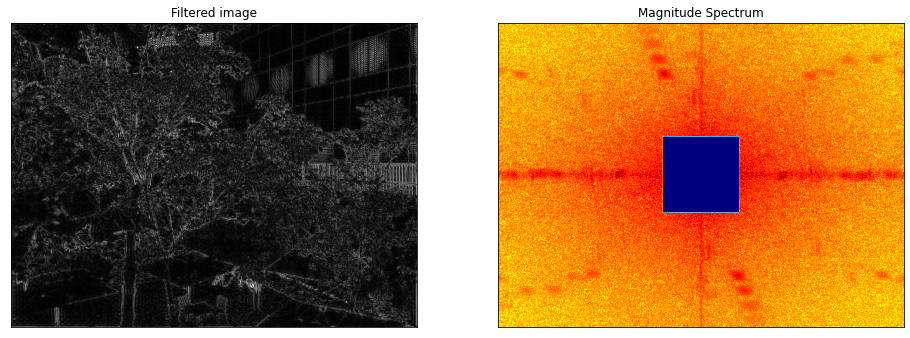

In [ ]:
# compute the magnitude spectrum of the transform
magnitude = np.log(np.abs(fftShift + 1))

# display the reconstructed/filtered image
(fig, ax) = plt.subplots(1, 2, figsize=(16, 12))
ax[0].imshow(recon, cmap="gray")
ax[0].set_title("Filtered image")
ax[0].set_xticks([])
ax[0].set_yticks([])

# display the magnitude of the FFT
ax[1].imshow(magnitude, cmap="jet")
# ax[1].imshow(magnitude)
ax[1].set_title("Magnitude Spectrum")
ax[1].set_xticks([])
ax[1].set_yticks([])

The following functions allow us to produce more decent filters.

In [ ]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

Next, we show a Gaussian low pass filter and a Highpass filter.

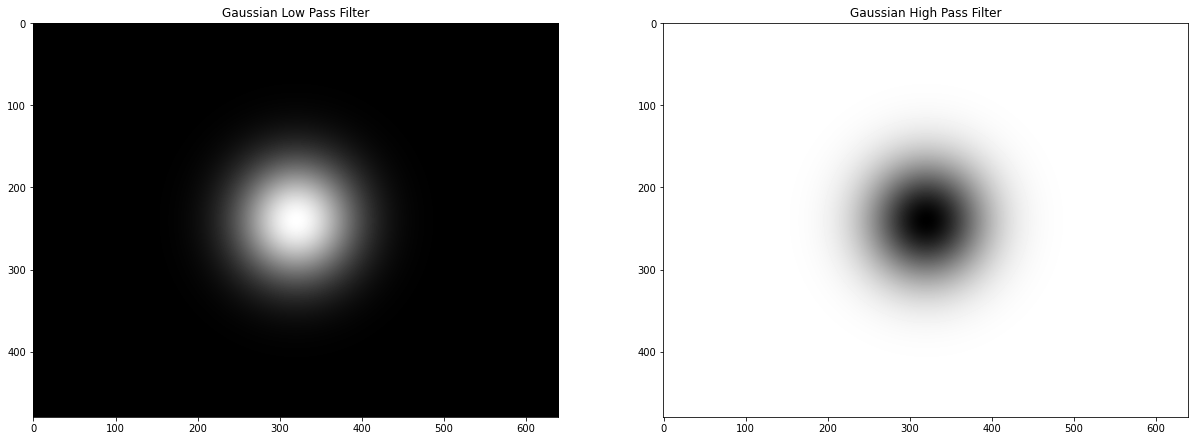

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()


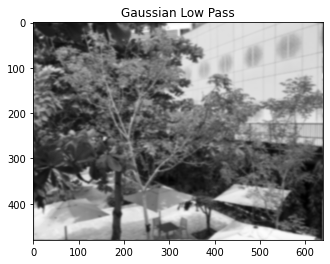

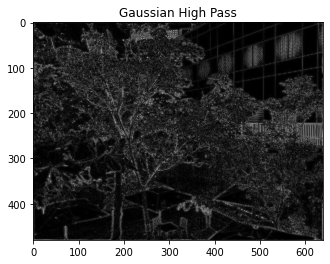

In [ ]:
## TODO
# Filter the image with the above filters.
# Remember that filtering in the FFT domain is simple 
# multiplication.
# Tip: to get a meaningful image, you have to use
# np.fft.ifftshift after the spectra multiplication.

original = np.fft.fft2(img_gray)
center = np.fft.fftshift(original)

# Your code here. 
# It should produce the following images.